In [1]:
!pip install git+https://github.com/robmarkcole/HASS-data-detective.git --upgrade

  Cloning https://github.com/robmarkcole/HASS-data-detective.git to /tmp/pip-req-build-htm78jy4
  Running command git clone -q https://github.com/robmarkcole/HASS-data-detective.git /tmp/pip-req-build-htm78jy4
  Created wheel for HASS-data-detective: filename=HASS_data_detective-2.4-cp36-none-any.whl size=7672 sha256=832800c23dcec270e3a645fbb9bf1db194137c4741f173dc93b0ad1b087299f4
  Stored in directory: /tmp/pip-ephem-wheel-cache-3t_ewr6m/wheels/1f/6c/2e/cf6ed0907cfc8fe055ce74b2e4b6e3f45ccb1632a3940739a5
Successfully built HASS-data-detective
  Found existing installation: HASS-data-detective 2.4
    Uninstalling HASS-data-detective-2.4:
      Successfully uninstalled HASS-data-detective-2.4
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from detective.core import db_from_hass_config
import pandas as pd
db = db_from_hass_config()

Successfully connected to database sqlite:////config/home-assistant_v2.db
There are 376 entities with data


In [3]:
d = db.fetch_all_sensor_data(limit=None)

The returned Pandas dataframe has 428402 rows of data.


In [4]:
def get_hour_plot(d: pd.DataFrame, name: str):
    d['last_changed'] = pd.to_datetime(d['last_changed'])

    d2 = d[d['entity_id'] == name]
    d2 = d2.astype(dict(state=float))

    d2.resample('2H', on='last_changed').state.mean().plot(label=name)

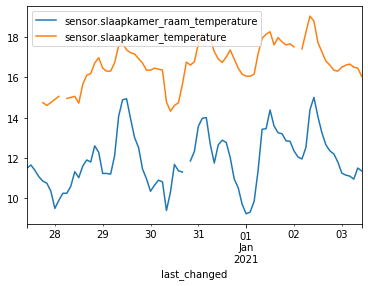

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
get_hour_plot(d, 'sensor.slaapkamer_raam_temperature')
get_hour_plot(d, 'sensor.slaapkamer_temperature')
plt.legend()

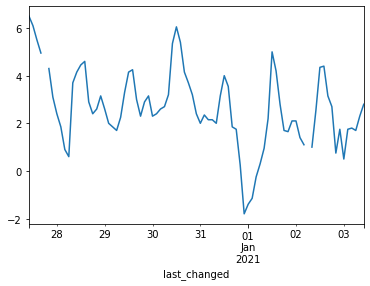

In [7]:
get_hour_plot(d, 'sensor.outside_temperature')

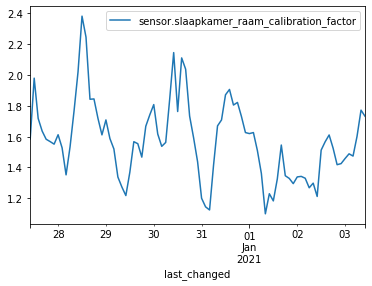

In [10]:
get_hour_plot(d, 'sensor.slaapkamer_raam_calibration_factor')
plt.legend()

In [11]:
def get_mean(d: pd.DataFrame, name: str):
    d['last_changed'] = pd.to_datetime(d['last_changed'])

    d2 = d[d['entity_id'] == name]
    d2 = d2.astype(dict(state=float))

    return d2.resample('2H', on='last_changed').state.mean().agg(['mean', 'std'])

In [12]:
get_mean(d, 'sensor.slaapkamer_raam_calibration_factor')

mean    1.578308
std     0.256550
Name: state, dtype: float64

In [13]:
def get_hour_plot(d: pd.DataFrame, name: str, min_=1.25, max_=2):
    d['last_changed'] = pd.to_datetime(d['last_changed'])

    d2 = d[d['entity_id'] == name]
    d2 = d2.astype(dict(state=float))
    d2 = d2[(d2['state'] > min_) & (d2['state'] < max_)]

    d2.resample('2H', on='last_changed').state.mean().plot(label=name)

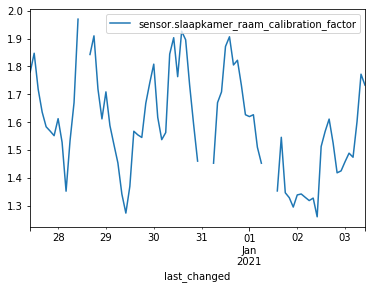

In [14]:
get_hour_plot(d, 'sensor.slaapkamer_raam_calibration_factor')
plt.legend()

In [15]:
def get_mean(d: pd.DataFrame, name: str, min_=1.25, max_=2):
    d['last_changed'] = pd.to_datetime(d['last_changed'])

    d2 = d[d['entity_id'] == name]
    d2 = d2.astype(dict(state=float))
    d2 = d2[(d2['state'] > min_) & (d2['state'] < max_)]

    return d2.resample('H', on='last_changed').state.mean().agg(['mean', 'std'])

In [16]:
get_mean(d, 'sensor.slaapkamer_raam_calibration_factor')

mean    1.585942
std     0.185483
Name: state, dtype: float64

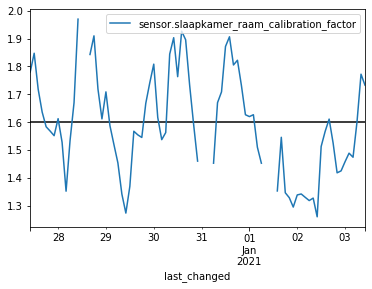

In [17]:
get_hour_plot(d, 'sensor.slaapkamer_raam_calibration_factor')
plt.hlines(1.6, 0, 1e10)
plt.legend()

In [18]:
def get_hour_plot(d: pd.DataFrame, name: str):
    d['last_changed'] = pd.to_datetime(d['last_changed'])

    d2 = d[d['entity_id'] == name]
    d2 = d2.astype(dict(state=float))

    d2.resample('2H', on='last_changed').state.mean().plot.bar(label=name)

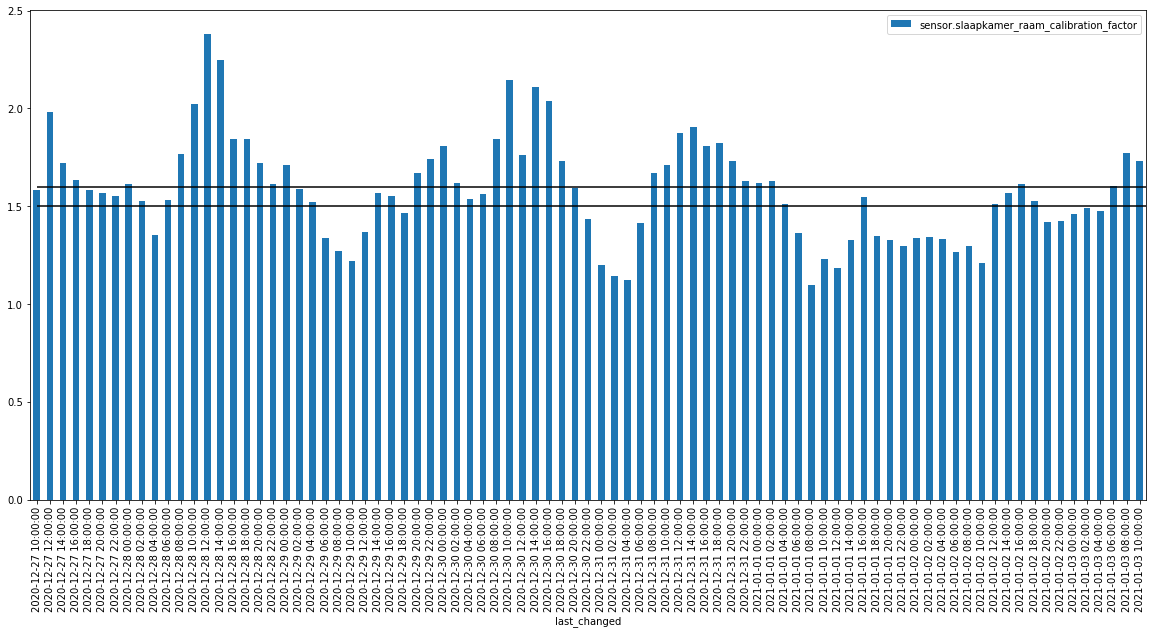

In [19]:
plt.figure(figsize=(20, 9))
get_hour_plot(d, 'sensor.slaapkamer_raam_calibration_factor')
plt.hlines(1.5, 0, 1e10)
plt.hlines(1.6, 0, 1e10)
plt.legend()